In [57]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import torch
from IPython.display import display
from PIL import Image

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [58]:
from ultralytics import YOLO

model = YOLO("yolov8n-pose.yaml") 
model = YOLO("yolov8n-pose.pt") 



In [59]:
results = model("./run_test1.jpg") 


image 1/1 c:\Users\Home\Desktop\IOT\athlead runing\run_test1.jpg: 384x640 1 person, 26.8ms
Speed: 4.5ms preprocess, 26.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


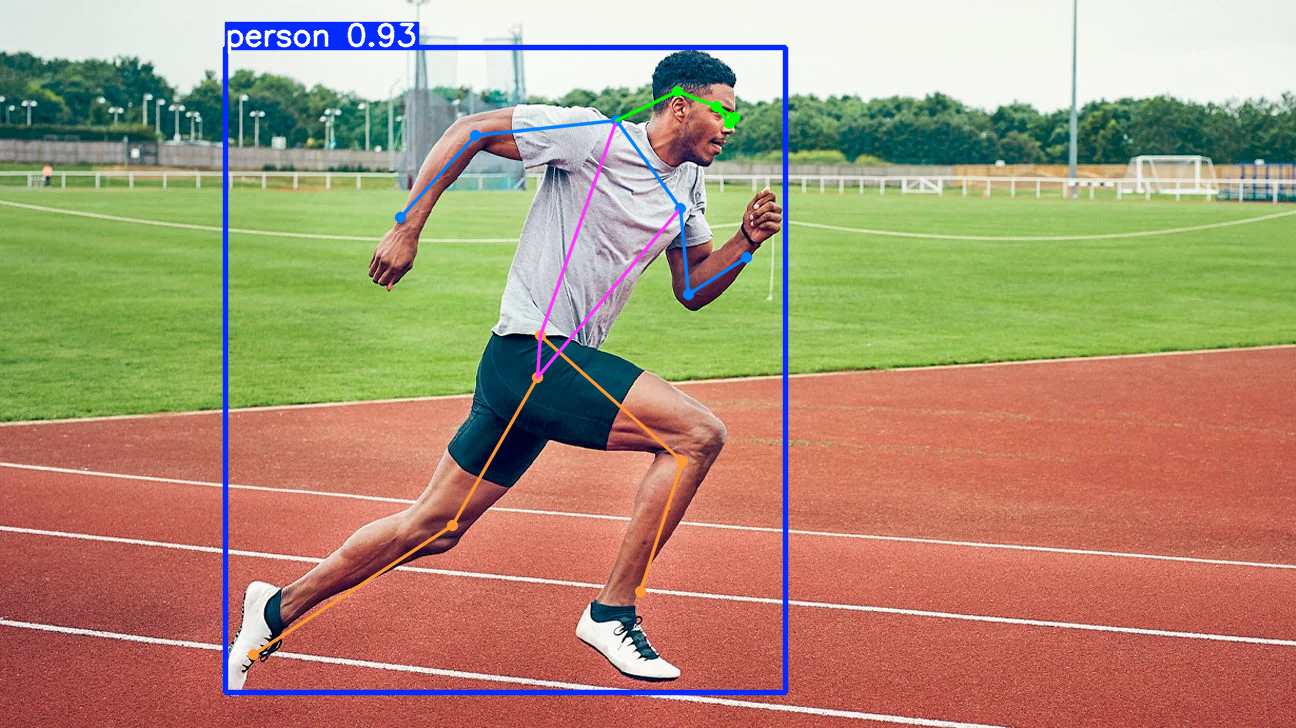

In [60]:
result_image = results[0].plot()



display(Image.fromarray(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)))

In [61]:

def compute_angle(start, middle, end):
    try:
        vector1 = middle - start
        vector2 = end - middle
        dot_product = np.dot(vector1, vector2)
        magnitude_v1 = np.linalg.norm(vector1)
        magnitude_v2 = np.linalg.norm(vector2)
        cos_angle = dot_product / (magnitude_v1 * magnitude_v2)
        angle_rad = np.arccos(np.clip(cos_angle, -1.0, 1.0))
        angle_deg = np.degrees(angle_rad)
        return angle_deg
    except:
        return None


In [62]:
class PoseEstimation:
    def __init__(self, video_name):
        self.model = YOLO('yolov8n-pose.pt')
        self.active_keypoints = [11, 13, 15]
        self.video_path = video_name
        self.scale = 1/2
        current_fps = 24
        desired_fps = 10
        self.skip_factor = current_fps // desired_fps

    def analyze_pose(self, show_angle=False):
        if show_angle:
            plt.ion()
            fig, ax = plt.subplots()
            angles = []
            times = []

        frame_count = 0
        color = (255, 255, 0)
        cv2.namedWindow("KeyPoints on Video", cv2.WINDOW_NORMAL)
        cap = cv2.VideoCapture(self.video_path)

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            frame_count += 1
            if frame_count % self.skip_factor != 0:
                continue

            height, width, _ = frame.shape
            window_width = int(width * self.scale)
            window_height = int(height * self.scale)
            cv2.resizeWindow("KeyPoints on Video", window_width, window_height)

            results = self.model(frame)
            if len(results[0].keypoints.xy) > 0:
                keypoints = results[0].keypoints.xy.cpu().numpy()[0]

                # Draw Keypoints
                for i in range(len(self.active_keypoints) - 1):
                    pt1 = tuple(keypoints[self.active_keypoints[i]].astype(int))
                    pt2 = tuple(keypoints[self.active_keypoints[i + 1]].astype(int))
                    cv2.line(frame, pt1, pt2, color, 8)
                    cv2.circle(frame, pt1, 5, color, -1)

                if show_angle:
                    angle = compute_angle(
                        keypoints[self.active_keypoints[0]],
                        keypoints[self.active_keypoints[1]],
                        keypoints[self.active_keypoints[2]]
                    )
                    if angle is not None:
                        angle_text = f"{round(angle)}" if not np.isnan(angle) else "N/A"
                        cv2.putText(frame, angle_text, (270, 1500), 
                                    cv2.FONT_HERSHEY_SIMPLEX, 5, color, 5, cv2.LINE_AA)
                        
                        if not np.isnan(angle):
                            angles.append(angle)
                            times.append(frame_count)
                            ax.clear()
                            ax.plot(times, angles, marker='o', color='orange')
                            ax.set_xlabel('Time')
                            ax.set_ylabel('Angle (degrees)')
                            ax.set_title('Angle vs. Time')
                            plt.draw()
                            plt.pause(0.05)

            cv2.imshow("KeyPoints on Video", frame)
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        cap.release()
        cv2.destroyAllWindows()
        plt.ioff()
        plt.close()


In [63]:

def run_analyze_pose(video_path, show_angle=False):
    pe = PoseEstimation(video_path)
    pe.analyze_pose(show_angle=show_angle)



0: 384x640 5 persons, 22.1ms
Speed: 1.7ms preprocess, 22.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 18.0ms
Speed: 2.2ms preprocess, 18.0ms inference, 7.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 21.9ms
Speed: 2.9ms preprocess, 21.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 21.8ms
Speed: 5.8ms preprocess, 21.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 15.3ms
Speed: 0.0ms preprocess, 15.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 13.1ms


C:\Users\Home\AppData\Local\Temp\ipykernel_24976\3130757439.py:8: RuntimeWarning: invalid value encountered in scalar divide
  cos_angle = dot_product / (magnitude_v1 * magnitude_v2)


Speed: 2.4ms preprocess, 13.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 11.2ms
Speed: 3.0ms preprocess, 11.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 13.4ms
Speed: 6.2ms preprocess, 13.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 10.7ms
Speed: 1.7ms preprocess, 10.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 13.5ms
Speed: 0.5ms preprocess, 13.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.3ms
Speed: 3.0ms preprocess, 13.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.7ms
Speed: 1.5ms preprocess, 16.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pe

KeyboardInterrupt: 

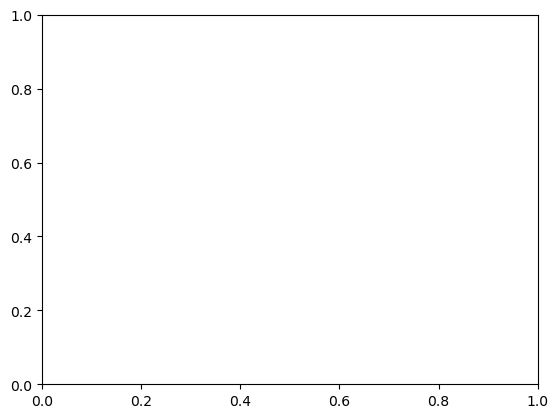

: 

In [64]:
run_analyze_pose('./vid/usain.mp4', show_angle=True)